### import data

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel('Data1.xlsx', index_col=0, header=[0,1]) # 325 X 40
df2 = pd.read_excel('Data2.xlsx', index_col=0, header=[0,1]) # 325 X 45

# merge data frames
df = df1.merge(df2, left_index=True, right_index=True) # 325 X 85

### prepare data

In [198]:
# create a new item NWP/GWP
df_nwp = df['NWP (£m) ']
df_gwp = df['GWP (£m)']
df_nwp_gwp = df_nwp / df_gwp
df_nwp_gwp.columns = [['NWP_GWP', 'NWP_GWP','NWP_GWP','NWP_GWP','NWP_GWP'],['2016YE', '2017YE','2018YE','2019YE','2020YE']]

In [199]:
# merge with df
df = df.merge(df_nwp_gwp, left_index=True, right_index=True) # 325 X 90

In [200]:
check_for_nan = df.isnull().values.any()
print (check_for_nan)
df = df.fillna(0)

True


In [201]:
# get item list
item_list = []
for i in range(len(df.columns)):
    if df.columns[i][0] not in item_list:
        item_list.append(df.columns[i][0])
    
item_list = tuple(item_list)
item_list

('NWP (£m) ',
 'SCR (£m)',
 'EoF for SCR (£m)',
 'SCR coverage ratio',
 'GWP (£m)',
 'Total assets (£m)',
 'Total liabilities (£m)',
 'Excess of assets over liabilities (£m) [= equity]',
 'Gross claims incurred (£m)',
 'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)',
 'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)',
 'Pure net claims ratio',
 'Net expense ratio',
 'Net combined ratio',
 'Pure gross claims ratio',
 'Gross expense ratio',
 'Gross combined ratio',
 'NWP_GWP')

### clean data

In [202]:
# delete rows with more than 3 zeros or year 2020 has 0 value in the column of interest
def clean_column(df, column_name):
    col = column_name
    for index in df.index:
        unique = df[[col]].loc[index].nunique()
        percentage = float(unique) / len(df[[col]].loc[index])
        if percentage < 0.8 or df[[col]].loc[index][-1] == 0.0:
            print ('Deleted: ', index, df[[col]].loc[index])
            df.drop(index, axis=0, inplace=True)
    return df

In [211]:
df = clean_column(df, 'GWP (£m)')
df

NWP (£m)                                             \
                2016YE        2017YE        2018YE        2019YE   
Firm 210  27889.340758  38199.311256  48117.993733  44638.769640   
Firm 4    22344.199923  23963.910709  25760.390158  25512.748836   
Firm 26   45309.838702   7239.360829   7616.755563  10450.175547   
Firm 247  13377.534020  24031.377272  22475.773945  10624.480076   
Firm 34    6817.399238   5780.781140   4497.979967   -181.612136   
Firm 105  31275.650872  11614.626226    -78.413307  10739.237658   
Firm 311  -1862.240506   9777.534671  12009.157860  12719.398352   
Firm 7     5855.172823  11688.570412   9414.976495  10975.189662   
Firm 73    5952.075574    642.030799  11615.851280  14800.729495   
Firm 151  -1750.945505   7626.419094   7867.158206   9028.414622   

                            SCR (£m)                              \
                2020YE        2016YE        2017YE        2018YE   
Firm 210  40135.692258    156.356311    253.133517    267.587277   
Firm 4    24996.021042  16573.644800  16332.748800  17103.616000   
Firm 26   10489.248083     13.010998   2615.457124   2647.668242   
Firm 247   9961.520679      6.679933     28.699002     14.423490   
Firm 34    8145.617320     70.971011   7076.519747   6783.113294   
Firm 105   4641.248617    154.592562  13872.860127   8970.442719   
Firm 311  10830.966262      0.971873   8883.247499   7935.936281   
Firm 7     8359.905292      0.000000   4042.827472   4313.755092   
Firm 73    5655.803588    268.024337   1679.951222   2084.662096   
Firm 151   8180.387573     44.357219   1237.097548   1165.127109   

                                      ... Gross combined ratio            \
                2019YE        2020YE  ...               2016YE    2017YE   
Firm 210    342.361395    418.388173  ...             0.871992  1.105867   
Firm 4    17219.246080  19600.262144  ...             0.848032  1.474778   
Firm 26    2719.948271   2369.903562  ...             0.829502  1.017688   
Firm 247     10.398542     10.106735  ...             0.585406  0.321478   
Firm 34    6328.086220   6443.117305  ...             0.000000  2.819749   
Firm 105   9390.562212   9637.507832  ...             0.811751  0.982502   
Firm 311   7918.799911   8655.247077  ...             0.000000  0.000000   
Firm 7     4106.815583   4497.938625  ...             0.000000  0.000000   
Firm 73    2927.300994   3490.682633  ...             0.000000  0.000000   
Firm 151   1409.125498   1527.871049  ...            -0.490269 -0.330262   

                                          NWP_GWP                      \
            2018YE    2019YE     2020YE    2016YE    2017YE    2018YE   
Firm 210  0.969446  0.883016   0.998139  1.000000  1.000000  1.000000   
Firm 4    1.727968  1.208823 -10.736084  0.759372  0.727603  0.718207   
Firm 26   0.879597  0.941402   0.948690  1.000000  1.000000  1.000000   
Firm 247  0.290755  0.262802   0.366671  0.984380  0.992923  0.990343   
Firm 34   1.235272  1.043209   1.635144  0.777133  0.460618  0.261289   
Firm 105  0.920198  0.942037   0.903999  0.980790  0.896902 -0.006083   
Firm 311  1.002591  0.871170   0.918942 -0.842274  0.850692  0.725460   
Firm 7    0.000000  0.000000   0.000000  0.891522  1.224845  0.974358   
Firm 73   1.364540  0.915093   1.062282  0.898168  0.460307  0.898017   
Firm 151 -4.969472 -0.443054   0.100372 -0.225824  0.938586  0.974094   

                              
            2019YE    2020YE  
Firm 210  1.000000  1.000000  
Firm 4    0.706031  0.715753  
Firm 26   1.000000  1.000000  
Firm 247  1.000000  1.000000  
Firm 34  -0.008761  0.397139  
Firm 105  0.980164  0.798610  
Firm 311  0.669849  0.564701  
Firm 7    0.974768  0.966134  
Firm 73   0.924995  0.806108  
Firm 151  0.982546  0.980669  

[10 rows x 90 columns]

### select data
#### 1 GWP

In [230]:
# select the largest n rows based on mean values
def get_large(df, column_name, n):
    col = column_name
    df_mean = df[[col]].mean(axis=1).to_frame(name = 'mean') # create mean df
    df_large = df_mean.nlargest(n, 'mean') # select largest 
    df_large_selected = df.loc[df_large.index] # select from df
    return df_large_selected

In [231]:
df = get_large(df, 'GWP (£m)', 10)

In [232]:
def plot_xfirm(df, ylog, ymin, ymax):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax = df.T.boxplot()
    ax.set_ylabel(df.columns[0][0])
    
    if ymin == None and ymax == None:
        pass
    else:
        ax.set_ylim([ymin, ymax])
    
    if ylog == True:
        ax.set_yscale('log')
        
    plt.xticks(rotation=90)
    plt.title(df.columns[0][0])
    plt.tight_layout()
    plt.savefig('fig_' + str(df.columns[0][0]) + '.png', dpi=900)
    plt.show()

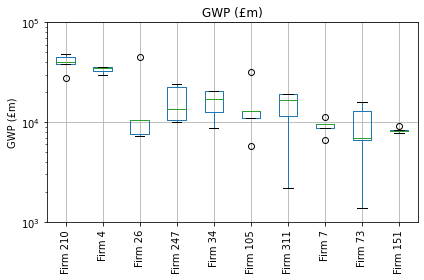

In [233]:
plot_xfirm(df[['GWP (£m)']], ylog=True, ymin=1e3, ymax=1e5)

#### 2 SCR coverage ratio

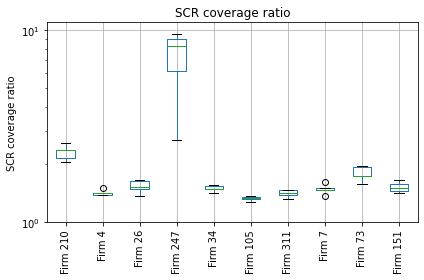

In [234]:
plot_xfirm(df[['SCR coverage ratio']], ylog=True, ymin=1e0, ymax=1.1e1)
#df

#### 3 NWP/GWP

In [242]:
def plot_combined(df1, df2, xlog, ylog, xmin, xmax, ymin, ymax):
    fig, ax = plt.subplots(figsize=(6, 4))
    for index in df1.index:
        ax.scatter(df1.loc[index], df2.loc[index], label=index)
    
    ax.fill_between((0, df1.max().max()), 0, 1, color = 'grey', alpha=0.3)
    
    if xmin == None and xmax == None:
        pass
    else:
        ax.set_xlim([xmin, xmax])
    
    if ymin == None and ymax == None:
        pass
    else:
        ax.set_ylim([ymin, ymax])
    
    if xlog == True:
        ax.set_xscale('log')
    if ylog == True:
        ax.set_yscale('log')
    
    ax.set_xlabel(df1.columns[0][0])
    ax.set_ylabel(df2.columns[0][0])

    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode="expand", borderaxespad=0, ncol=3)
    plt.tight_layout()
    plt.savefig('fig_comb_'+ str(df1.columns[0][0]) + str(df2.columns[0][0]) + '.png', dpi=900)
    plt.show()

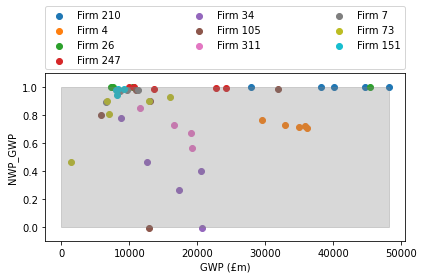

In [244]:
plot_combined(df[['GWP (£m)']], df[['NWP_GWP']], xlog=False, ylog=False, xmin=None, xmax=None, ymin=-0.1, ymax=1.1)

In [245]:
df[['NWP_GWP']]
print (index, df['NWP_GWP'].mean(axis=1))

('NWP_GWP', '2020YE') Firm 210    1.000000
Firm 4      0.725393
Firm 26     1.000000
Firm 247    0.993529
Firm 34     0.377484
Firm 105    0.730077
Firm 311    0.393685
Firm 7      1.006325
Firm 73     0.797519
Firm 151    0.730014
dtype: float64


#### 4 Gross claims incurred

In [246]:
def plot_xyear(df, ylog, ymin, ymax):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    year = ['2016', '2017', '2018', '2019', '2020']
    ax.set_xlabel('Year')
    ax.set_ylabel(df.columns[0][0])
    
    for index in df.index:
        ax.plot(year, df.loc[index], marker = 'o', label=index)

    if ymin == None and ymax == None:
        pass
    else:
        ax.set_ylim([ymin, ymax])
    
    if ylog == True:
        ax.set_yscale('log')    
        
    plt.xticks()
    plt.title(df.columns[0][0])
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.tight_layout()
    plt.savefig('fig_' + str(df.columns[0][0]) + '.png', dpi=900)
    plt.show()

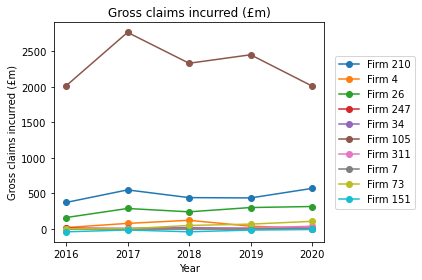

In [247]:
plot_xyear(df[['Gross claims incurred (£m)']], ylog=False, ymin=None, ymax=None)

In [249]:
df[['Gross claims incurred (£m)']]
print (index, df['Gross claims incurred (£m)'].mean(axis=1))

('NWP_GWP', '2020YE') Firm 210     472.028589
Firm 4        50.908223
Firm 26      258.980863
Firm 247       3.130778
Firm 34        7.546265
Firm 105    2314.729370
Firm 311       9.714746
Firm 7         0.000000
Firm 73       43.328387
Firm 151     -26.314840
dtype: float64


#### 5 Net combined ratio

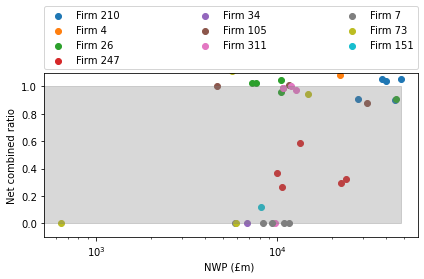

In [251]:
plot_combined(df[['NWP (£m) ']], df[['Net combined ratio']], xlog=True, ylog=False, xmin=None, xmax=None, ymin=-0.1, ymax=1.1)

In [256]:
df[['Net combined ratio']]
print (index, df['Net combined ratio'].mean(axis=1), df[['Net combined ratio']])

('NWP_GWP', '2020YE') Firm 210    0.991838
Firm 4      0.816866
Firm 26     0.995523
Firm 247    0.365685
Firm 34     1.514595
Firm 105    0.971920
Firm 311    0.593014
Firm 7      0.000000
Firm 73     0.698062
Firm 151   -0.589256
dtype: float64          Net combined ratio                                        
                     2016YE    2017YE    2018YE    2019YE    2020YE
Firm 210           0.909770  1.053698  1.055496  0.897656  1.042572
Firm 4             1.080209  1.707291  2.119041  2.586257 -3.408470
Firm 26            0.909373  1.028087  1.027733  0.961812  1.050612
Firm 247           0.585713  0.321801  0.290942  0.262546  0.367423
Firm 34            0.000000  3.097137  1.511077  1.309232  1.655531
Firm 105           0.878167  1.007967  0.988511  0.985311  0.999644
Firm 311           0.000000  0.000000  1.002591  0.975659  0.986822
Firm 7             0.000000  0.000000  0.000000  0.000000  0.000000
Firm 73            0.000000  0.000000  1.433751  0.944492  1.112066
Firm 